<a href="https://www.kaggle.com/code/ammarashraf1/english-premier-league-analysis?scriptVersionId=222014358" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **English Premier League Analysis**

# Import Needed Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Data And Apply EDA

In [2]:
df = pd.read_csv('/kaggle/input/english-premier-league-and-championship-full-dataset/England CSV.csv')

**Data Representation**

In [3]:
df['Match'] = df['HomeTeam'] + ' vs ' + df['AwayTeam']


In [4]:
df.head()

,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,...,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League,Match
0,16/01/2025,2024/25,Ipswich Town,Brighton & Hove Albion,0,2,A,0.0,1.0,A,...,14.0,1.0,9.0,2.0,2.0,0.0,0.0,20250116,Premier League,Ipswich Town vs Brighton & Hove Albion
1,16/01/2025,2024/25,Man United,Southampton,3,1,H,0.0,1.0,A,...,10.0,4.0,4.0,1.0,3.0,0.0,0.0,20250116,Premier League,Man United vs Southampton
2,15/01/2025,2024/25,Everton,Aston Villa,0,1,A,0.0,0.0,D,...,10.0,8.0,5.0,2.0,1.0,0.0,0.0,20250115,Premier League,Everton vs Aston Villa
3,15/01/2025,2024/25,Leicester,Crystal Palace,0,2,A,0.0,0.0,D,...,6.0,4.0,3.0,0.0,0.0,0.0,0.0,20250115,Premier League,Leicester vs Crystal Palace
4,15/01/2025,2024/25,Newcastle,Wolves,3,0,H,1.0,0.0,H,...,13.0,4.0,2.0,0.0,2.0,0.0,0.0,20250115,Premier League,Newcastle vs Wolves


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12153 entries, 0 to 12152
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           12153 non-null  object 
 1   Season         12153 non-null  object 
 2   HomeTeam       12153 non-null  object 
 3   AwayTeam       12153 non-null  object 
 4   FTH Goals      12153 non-null  int64  
 5   FTA Goals      12153 non-null  int64  
 6   FT Result      12153 non-null  object 
 7   HTH Goals      11229 non-null  float64
 8   HTA Goals      11229 non-null  float64
 9   HT Result      11229 non-null  object 
 10  Referee        9329 non-null   object 
 11  H Shots        9329 non-null   float64
 12  A Shots        9329 non-null   float64
 13  H SOT          9329 non-null   float64
 14  A SOT          9329 non-null   float64
 15  H Fouls        9329 non-null   float64
 16  A Fouls        9329 non-null   float64
 17  H Corners      9329 non-null   float64
 18  A Corn

In [6]:
df.describe()

,FTH Goals,FTA Goals,HTH Goals,HTA Goals,H Shots,A Shots,H SOT,A SOT,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order
count,12153.000000,12153.000000,11229.000000,11229.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,1.215300e+04
mean,1.531309,1.160948,0.689554,0.511265,13.618716,10.784543,6.007503,4.704684,11.303462,11.781113,6.056383,4.770715,1.462536,1.785722,0.062386,0.085968,2.008629e+07
std,1.306927,1.147714,0.838796,0.731610,5.349420,4.678710,3.275177,2.757288,3.752442,3.931377,3.107327,2.746754,1.215747,1.285168,0.252706,0.291579,9.224046e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.993081e+07
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,9.000000,9.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.001010e+07
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,11.000000,12.000000,6.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.009012e+07
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,8.000000,6.000000,14.000000,14.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000,2.017012e+07
max,9.000000,9.000000,5.000000,5.000000,43.000000,31.000000,24.000000,20.000000,33.000000,29.000000,20.000000,19.000000,7.000000,9.000000,3.000000,2.000000,2.025012e+07


In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

Date                0
Season              0
HomeTeam            0
AwayTeam            0
FTH Goals           0
FTA Goals           0
FT Result           0
HTH Goals         924
HTA Goals         924
HT Result         924
Referee          2824
H Shots          2824
A Shots          2824
H SOT            2824
A SOT            2824
H Fouls          2824
A Fouls          2824
H Corners        2824
A Corners        2824
H Yellow         2824
A Yellow         2824
H Red            2824
A Red            2824
Display_Order       0
League              0
Match               0
dtype: int64

**Top 10 Home Teams**

In [9]:
df['HomeTeam'].value_counts().head(10)

HomeTeam
Man United     604
Tottenham      604
Liverpool      603
Everton        603
Arsenal        603
Chelsea        603
Newcastle      565
West Ham       547
Aston Villa    547
Man City       508
Name: count, dtype: int64

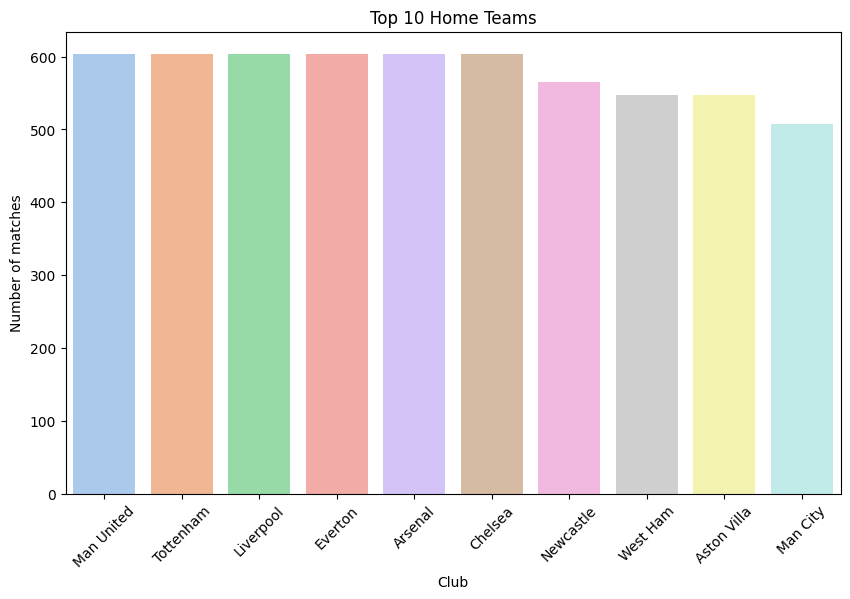

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['HomeTeam'].value_counts().head(10).index,
            y=df['HomeTeam'].value_counts().head(10).values,
            palette='pastel',
        )
plt.xlabel('Club')
plt.ylabel('Number of matches')
plt.title('Top 10 Home Teams')
plt.xticks(rotation=45)
plt.show()

**Top 10 Away Teams**

In [11]:
df['AwayTeam'].value_counts().head(10)

AwayTeam
Arsenal        604
Chelsea        604
Man United     603
Tottenham      603
Everton        603
Liverpool      603
Newcastle      566
Aston Villa    546
West Ham       546
Man City       509
Name: count, dtype: int64

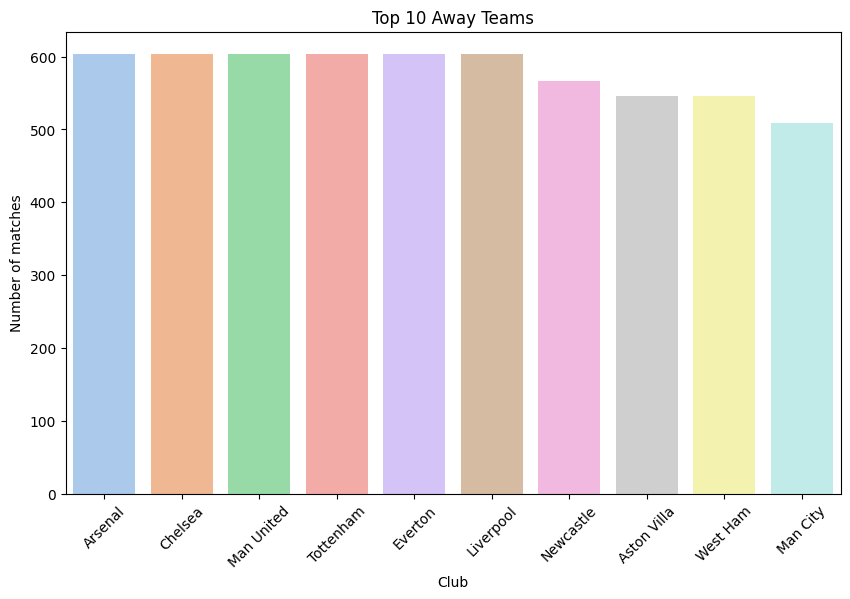

In [12]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x=df['AwayTeam'].value_counts().head(10).index, 
    y=df['AwayTeam'].value_counts().head(10).values, 
    palette='pastel', 
)

plt.xlabel('Club')
plt.ylabel('Number of matches')
plt.title('Top 10 Away Teams')
plt.xticks(rotation=45)
plt.show()


**Full Time Home Goals**

In [13]:
df['FTH Goals'].describe()

count    12153.000000
mean         1.531309
std          1.306927
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          9.000000
Name: FTH Goals, dtype: float64

In [14]:
Full_Time_Home_Goals = df['FTH Goals'].value_counts().reset_index()
Full_Time_Home_Goals

,FTH Goals,count
0,1,3914
1,2,2954
2,0,2834
3,3,1496
4,4,633
5,5,217
6,6,67
7,7,27
8,8,7
9,9,4


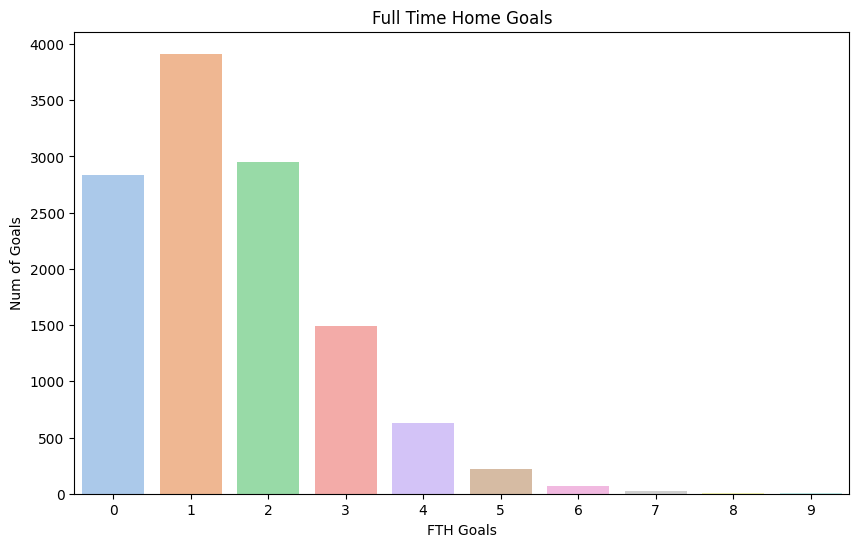

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=Full_Time_Home_Goals['FTH Goals'], y=Full_Time_Home_Goals['count'], data=Full_Time_Home_Goals, palette='pastel')
plt.ylabel('Num of Goals')
plt.title('Full Time Home Goals')
plt.show()

**Full Time Away Goals**

In [16]:
df['FTA Goals'].describe()

count    12153.000000
mean         1.160948
std          1.147714
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          9.000000
Name: FTA Goals, dtype: float64

In [17]:
Full_Time_Away_Goals = df['FTA Goals'].value_counts().reset_index()
Full_Time_Away_Goals

,FTA Goals,count
0,1,4194
1,0,4093
2,2,2344
3,3,1043
4,4,346
5,5,94
6,6,33
7,7,3
8,8,2
9,9,1


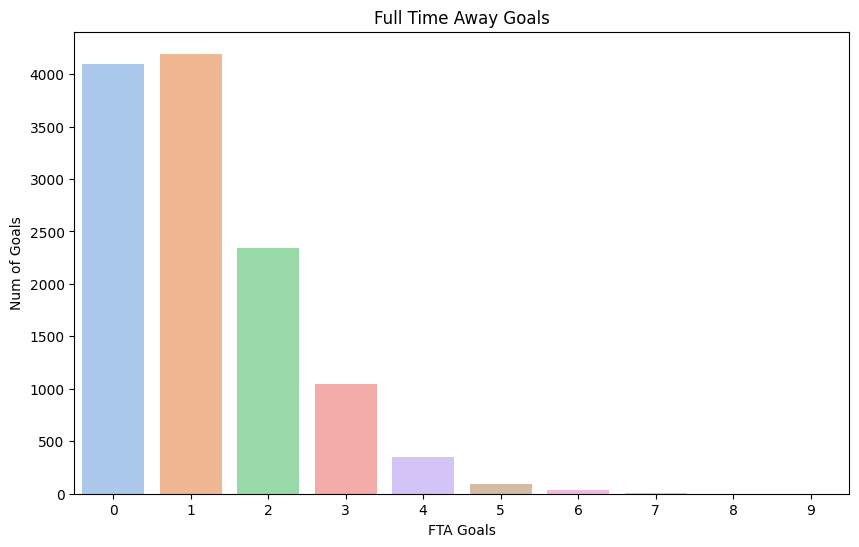

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x=Full_Time_Away_Goals['FTA Goals'], y=Full_Time_Away_Goals['count'], data=Full_Time_Away_Goals, palette='pastel')
plt.ylabel('Num of Goals')
plt.title('Full Time Away Goals')
plt.show()

**Top 5 Matches with Highest Total Goals**

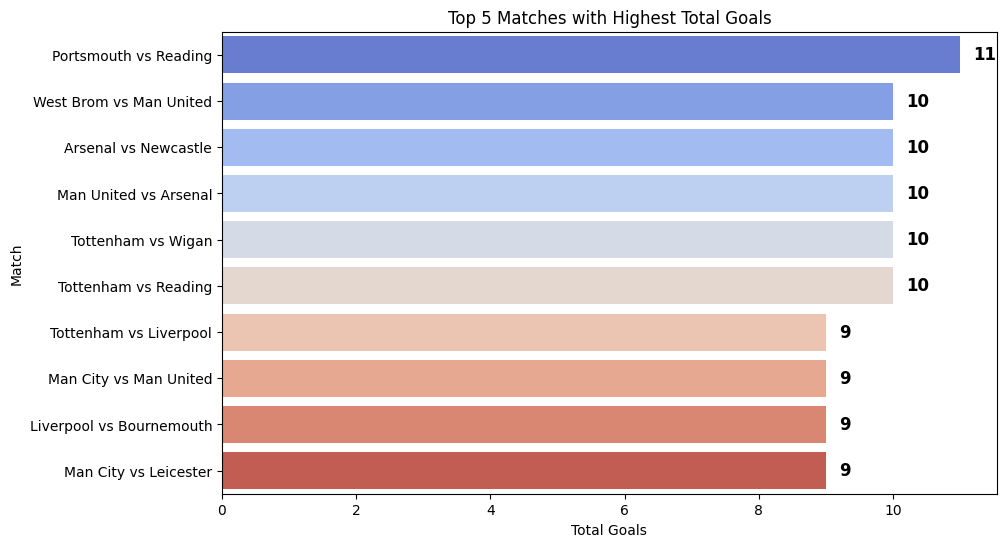

In [19]:
df['TotalGoals'] = df['FTH Goals'] + df['FTA Goals']

top_goal_matches = df.nlargest(10, 'TotalGoals')

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='TotalGoals', y='Match', data=top_goal_matches, palette='coolwarm', ax=ax)

for index, value in enumerate(top_goal_matches['TotalGoals']):
    ax.text(value + 0.2, index, str(value), va='center', fontsize=12, fontweight='bold')

plt.xlabel('Total Goals')
plt.ylabel('Match')
plt.title('Top 5 Matches with Highest Total Goals')
plt.show()

**Full-Time Result Percentage**

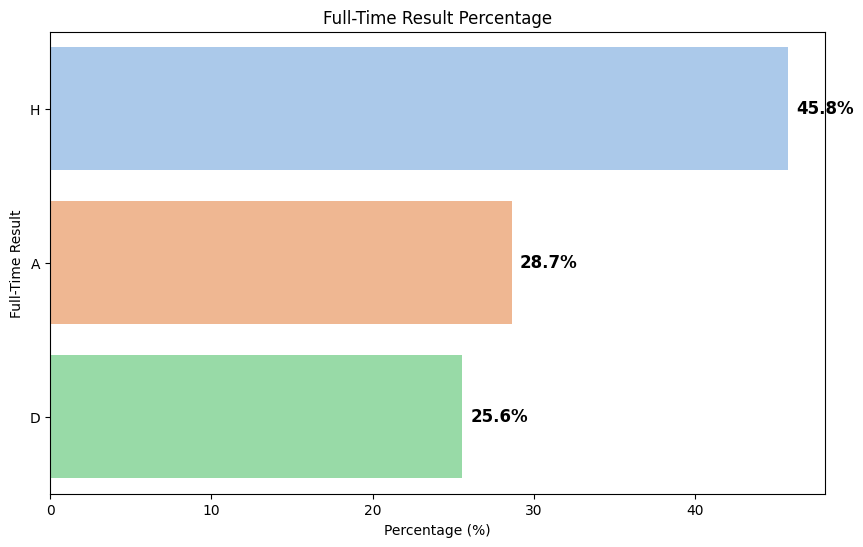

In [20]:
FT_Result_Percentage = df['FT Result'].value_counts(normalize=True).reset_index()
FT_Result_Percentage.columns = ['FT Result', 'Percentage']
FT_Result_Percentage['Percentage'] *= 100

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Percentage', y='FT Result', data=FT_Result_Percentage, palette='pastel', ax=ax)

for index, value in enumerate(FT_Result_Percentage['Percentage']):
    ax.text(value + 0.5, index, f"{value:.1f}%", va='center', fontsize=12, fontweight='bold')

plt.xlabel('Percentage (%)')
plt.ylabel('Full-Time Result')
plt.title('Full-Time Result Percentage')
plt.show()

**Top 10 Clean Matches (No Red Cards)**

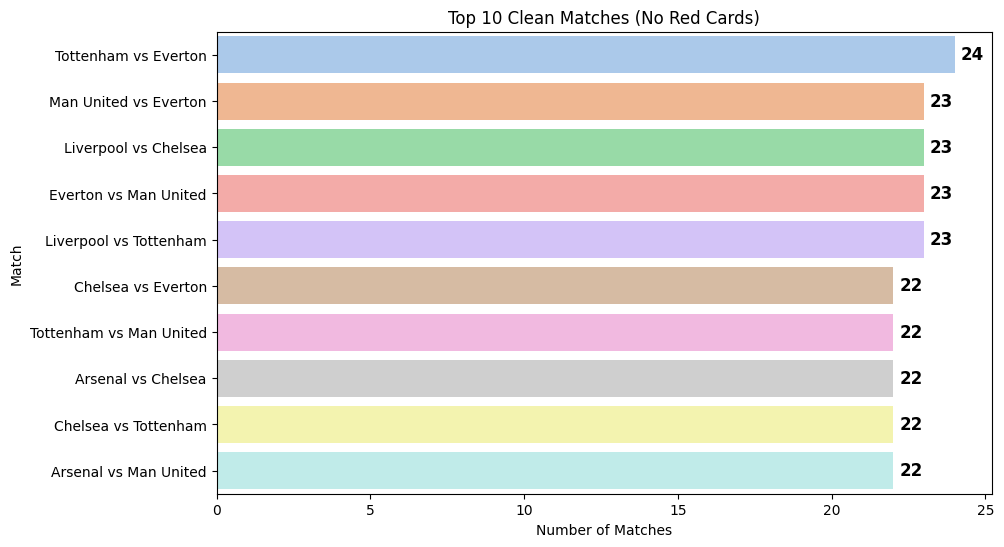

In [21]:
top_clean_matches = df[(df['A Red'] == 0) & (df['H Red'] == 0)]['Match'].value_counts().head(10).reset_index()
top_clean_matches.columns = ['Match', 'Count']

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Count', y='Match', data=top_clean_matches, palette='pastel')

for index, value in enumerate(top_clean_matches['Count']):
    ax.text(value + 0.2, index, str(value), va='center', fontsize=12, fontweight='bold')

plt.xlabel('Number of Matches')
plt.ylabel('Match')
plt.title('Top 10 Clean Matches (No Red Cards)')
plt.show()
